Net IDs: hak68, ota3, gnp24

# Introduction

Diabetes is one of the most common chronic diseases in America. We sought to analyze how 

**Data sources**

Original Dataframes

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn import preprocessing
from scipy import stats

import statsmodels.api as sm

import duckdb
import warnings 
warnings.filterwarnings('ignore')

import plotly.express as px

In [15]:
medication_df = pd.read_csv("Medication_Data_Kaggle_V1.csv")
socio_eco_df = pd.read_csv("Socio_Economics_Data_Kaggle_V1.csv")
patient_data_training_df = pd.read_csv("Patient_Data_Training_Kaggle_V1.csv")
patient_data_testing_df = pd.read_csv("Patient_Data_Testing_Features.csv")

Analysis-ready Dataframe

In [16]:
diabetes_df = pd.read_csv("diabetes_1.csv")


Data cleaning

**Research Question**

Can we predict how much a patient pays for diabetes care considering the treatment recieved and other demographic factors that go into their care?

**Summary of Findings**

# Data description

**What are the observations (rows) and the attributes (columns)?**

The dataframe, diabetes_df, which is our analysis ready data, observes certain attributes for each diabetes patient, recognized by their unique patient id (each row is data for one patient). 

diabetes_df has attributes about general demographics of the patient, the many factors that might have went into a patient's diabetes care, and the cost of care for each patient:
[image-5.png](attachment:image-5.png)

The other set of attributes in diabetes_df is types of medication taken by the patient. The values in each row are binary, either a 0 or 1 indicating that, no, the patient did not take this medication, or yes, they did:
![image-4.png](attachment:image-4.png)

There are also attributes concerning a patient's socio-economic background: 
![image-3.png](attachment:image-3.png)  



**Why was this dataset created?**

This data set was created to analyze the factors that go into diabetes care, the demographics of diabetes patients, and how much it cost these patients to get care. This data could be useful for hospitals to help them improve their healthcare management or chronic disease management programs. 

**Who funded the creation of the dataset?**

We do not know who funded the creation of this dataset, but we know that it was provided by Softec, an AI company as part of a data science competition. 

**What processes might have influenced what data was observed and recorded and what was not?**

Patient consent & participation might have influenced or affected how much specifc data was collected. Certain patients might not want to disclose certain information. Also, the data was collected from adults only, most of them being elderly, so it is likely that sources for children were not available. The year that the patient information was recorded on the dataset goes as far back as 2017 which may or may not be enough time to make predictions about the rise and fall of diabetes healthcare so the observation of long-term trends are affected. Also, we do not know the extent of the resources that the data collectors had. It could be that they paid certain hospitals for data; in that case the prices of datasets they were willing to pay for, affects what is recorded. The data collectors could have also targeted certain areas or demographics to get data from which also affects what is observed and what is not.


**What preprocessing was done, and how did the data come to be in the form that you are using?**

The data we are using to build our visualizations is the result of combining four seperate, but connected, datasets into a larger one called diabetes_df. These four dataframes were connected by their ID column. So in creating this dataframe, we made sure that the uniquenss of patient ID's and the amount of them, were preserved. Also, we wanted to make the columns of the dataframe easier to query, and not have to repeat the same querying syntax for special column names, so we replaced all spaces with _. 

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

We do not know how aware these patients were at the collection of the data. The attributes of the dataframe do not seem like data that could be collected with surveys or interviews, but rather data that has to be from some type of mass medical record. Patients are not often aware of what hospitals do with their data so it is a real possibility that the people who the dataset is based on, have no idea that they are the subject.

**Where can your raw source data be found, if applicable?**

This question is not applicable to us, as we do not know where Softec got the dataset from. 

# Data limitations

One limitation of our data is that there is a total cost of patient care for that year, but the indivudal factors that went into the care are not priced. So we do not explicity know which factors such as medication taken, length of stay, treatments given etc. affected the total price the most. We will have to find out these prices through predictions from our model intead of observed occurences in real life. When trying to predict these prices, our model might have oddities or outliers that might make it difficult for us to confidently make predictions for these values.

Another limitation of our data is regarding the lack of information we have about what some of the columns are trying to portray. For example, there are columns SVI1, SVI3, SVI4, and SVI that measure percentile rankings for various socioeconomic and ethnic status. However, some of these values are negative numbers that also have absolute value greater than 1 and all of the positive numbers are less than 1. So, do negative percentiles have any significance? Are the percentile values out of 1 or out of 100? Or is the data in these columns simply meaningless? These are the questions we have to consider in our analysis and if we decide to not use those columns at all, then we lose information about a patient's socioeconomic status when creating our predictive model.

# Preregistration statements

Accross states in the USA, there are differences in regions with some being more or less expensive than others and different regions having different ways of life. We wanted to see how this extends to the cost of diabetes so our first preregistered hypothesis concerns the variation in cost of diabetes based on region and a further analysis to determine the significance of our results.

**Hypothesis:** Patients who live in the south spend more money on the total cost of treatment.

**Analysis:** We will create a new column indicating which region a patient lives in. Then, we will run a linear regression where we input region as a dummy variable, and output cost of treatment. The North region dummy variable will be our reference variable so that we can test that the coefficient for the South region is greater. 

The Area Deprivation Index(ADI) allows for a ranking of neighborhoods by socioeconomic statuses and advantages. A higher ADI indicates high area deprivation. We wanted to explore the effect of ADI on how much a patient pays for diabetes care and do further analysis to determine the significance of our results.

**Hypothesis 2:** Patients with a high area deprivation index will spend less on diabetes care.

**Analysis:** Run a multivariable regression, with all else variables equal, and see the effect of area deprivation index on total cost of care for patient.

# Data Analysis and Intepretation

Race and Cost -- Jyna

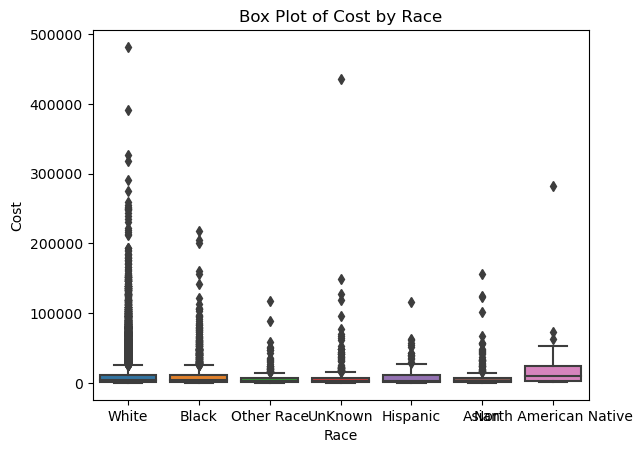

In [17]:
sns.boxplot(x='Race', y='TotalCost_Y_Actual', data=diabetes_df,)
plt.xlabel('Race')
plt.ylabel('Cost')
plt.title('Box Plot of Cost by Race')
plt.show()

Region and cost -- Harriet

In [18]:
fig = px.choropleth(diabetes_with_dummies,locations='State', locationmode = 'USA-states',scope= 'usa', 
                    color='TotalCost_Y_Actual', hover_name='State')

fig.show()

NameError: name 'diabetes_with_dummies' is not defined

LOS and cost -- Wunmi

Popular medicines pie chart -- Jyna

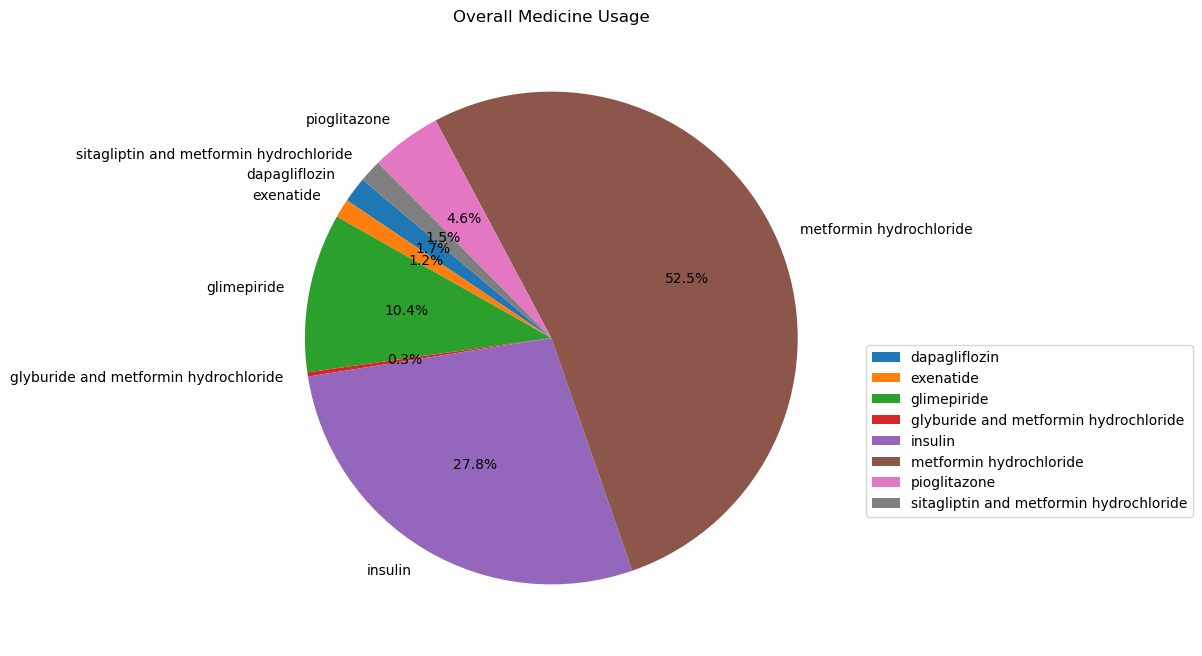

In [19]:
medicine_columns = medication_df.columns[2:] 

medicine_usage = medication_df[medicine_columns].sum()
colors = plt.cm.viridis(range(len(medicine_usage)))

plt.figure(figsize=(8, 8))
plt.pie(medicine_usage, labels=medicine_usage.index, autopct='%1.1f%%', startangle=140)


plt.title('Overall Medicine Usage')

plt.legend(medicine_usage.index, loc='upper left', bbox_to_anchor=(1, 0.5))

plt.show()

Race and LOS

Region and LOS

ADI and Cost

## Predicting Cost of Diabetes based on Treatment and Demographics

We will train a multivariate least squares model to predict the cost of diabetes based on selected diabetes treatments and other patient demographics

**Preparing diabetes_df to have a Region attribute and only numeric data types**


In [ ]:
state_to_region = {'Northeast': ['New York', 'Massachusetts', 'Pennsylvania', 'Maryland'],
                  'South': ['Florida', 'Texas', 'Tennessee', 'Kentucky', 'North Carolina', 'Virginia', 'Alabama', 'Louisiana', 'Georgia', 'Mississippi', 'Missouri'],
                  'Midwest': ['Illinois', 'Ohio', 'Michigan', 'Wisconsin'], 'West': ['Colorado', 'Washington', 'California', 'Nevada', 'Arizona']}

diabetes_df['Region'] = pd.Series()

for i in range(len(diabetes_df['State'])):
    if diabetes_df['State'][i] in state_to_region['Northeast']:
        diabetes_df['Region'][i] = 'Northeast'
    elif diabetes_df['State'][i] in state_to_region['South']:
        diabetes_df['Region'][i] = 'South'
    elif diabetes_df['State'][i] in state_to_region['Midwest']:
        diabetes_df['Region'][i] = 'Midwest'
    elif diabetes_df['State'][i] in state_to_region['West']:
        diabetes_df['Region'][i] = 'West' 
    else:
        diabetes_df['Region'][i] = 'Unknown'

print(diabetes_df['Region'])
print(diabetes_df['Region'].unique())



In [ ]:
region_dummies = pd.get_dummies(diabetes_df['Region'], dtype = int)
race_dummies = pd.get_dummies(diabetes_df['Race'], dtype = int)

gender_dict = {'Male': 0, 'Female': 1}
diabetes_df['Sex'] = diabetes_df['Sex'].map(gender_dict)

er = diabetes_df['#_ER'] + diabetes_df['#_ER_Admissions']
er
diabetes_df['ER_Admissions'] = er

print(region_dummies.head())
print(race_dummies.head())
print(diabetes_df['Sex'].head())
print(diabetes_df['ER_Admissions'].head())

In [ ]:
diabetes_with_dummies = pd.concat([diabetes_df, race_dummies, region_dummies], axis = 1)

diabetes_with_dummies = diabetes_with_dummies.rename(columns = {'UnKnown':'Unknown_race', 'Other Race' : 'Other_race', 
                                                              'North American Native': 'North_American_Native', 'Unknown': 
                                                              'Unknown_region'})



diabetes_with_dummies is the dataframe we will now refer to for our model.

In [ ]:
diabetes_with_dummies.head()

**Log-log transformation on diabetes_with_dummies before splitting and training model**

In [ ]:
log_cost = np.log(diabetes_with_dummies['TotalCost_Y_Actual']) #performed log transofrm on output (cost)
diabetes_with_dummies['log_cost'] = log_cost 

diabetes_with_dummies = diabetes_with_dummies[np.isfinite(diabetes_with_dummies['log_cost']) == True] #removed infinte values from set

log_columns = ['Age', 'Diagnosis', '#_Total_Claims', '#_Rx_Claims', 'Avg_ADI']
diabetes_with_dummies[['log_Age','log_Diagnosis', 'log_#_Total_Claims',
                       'log_#_Rx_Claims','log_Avg_ADI']] = np.log(diabetes_with_dummies[log_columns])
diabetes_with_dummies.iloc[:, 74:].head()

**Creating training and testing dataframes from diabetes_with_dummies** 

In [ ]:
diabetes_train, diabetes_test = train_test_split(diabetes_with_dummies, test_size = 0.2, train_size = 0.8, random_state = 2950)

print(np.shape(diabetes_with_dummies))
print(np.shape(diabetes_train))
print(np.shape(diabetes_test))

diabetes_train = diabetes_train[diabetes_train['TotalCost_Y_Actual'].isnull() == False]

**Fitting our model**

In [ ]:
diabetes_train = diabetes_train.dropna() #drop na from training dataframe

input_columns = ['log_Age', 'Sex',
       'Avg._LOS', 'log_Diagnosis', 'log_#_Total_Claims', '#_Rehabilitation_Hospital',
        '#_Readmissions', '#_Labs', '#_Imaging', '#_Dialysis', 
         'log_#_Rx_Claims', '#_DME', 'dapagliflozin',
       'exenatide', 'glimepiride', 'glyburide_and_metformin_hydrochloride',
       'insulin', 'metformin_hydrochloride', 'pioglitazone',
       'sitagliptin_and_metformin_hydrochloride', 'log_Avg_ADI', 
       'ER_Admissions', 'Asian', 'Black', 'Hispanic',
       'Other_race', 'Unknown_race', 'White', 'Midwest', 'South',
       'Unknown_region', 'West']

X = diabetes_train[input_columns]
y = diabetes_train[['log_cost']]

model = LinearRegression().fit(X,y)

#displaying coefficients
coefs = model.coef_[0] 
loop = zip(input_columns, coefs)
d = dict(loop)
for i in d:
    print(f'{i}: {round(d[i],2)}')

#displaying intercept
interc = round(model.intercept_[0],2)
print(f'intercept: {interc}')


In [ ]:
np.shape(diabetes_train)

In [ ]:

diabetes_test = diabetes_test.dropna() #drop na from testing dataframe

train_predictions = model.predict(diabetes_train[input_columns])
test_predictions = model.predict(diabetes_test[input_columns])


print(len(train_predictions))
print(len(test_predictions))



In [ ]:
residuals = diabetes_train['log_cost'] - train_predictions[:, 0]

plt.scatter(train_predictions[:, 0], residuals)
plt.xlabel("Predicted Cost")
plt.ylabel("Residuals")



**Evaluation strength of our model**


In [ ]:
train_rmse = np.sqrt(np.mean((train_predictions[:, 0] - diabetes_train['log_cost'])**2))
test_rmse = np.sqrt(np.mean((test_predictions[:, 0]-diabetes_test['log_cost'])**2))
# Print train RMSE
print(f"Train RMSE: {train_rmse:.2f}")
# Print test RMSE
print(f"Test RMSE: {test_rmse:.2f}")

In [ ]:
train_mae= np.mean(np.abs(train_predictions[:, 0] - diabetes_train['log_cost']))
# Print train MAE
print(f'Train MAE: {train_mae:.2f}')
# Print test MAE
test_mae = np.mean(np.abs(test_predictions[:, 0] - diabetes_test['log_cost']))
print(f'Test MAE: {test_mae:.2f}')

What does the MAE and RMSE tell us?
whqjifehkewmrjeherebhrjnek

**Interpreting significance of our results**

In [ ]:
#df = diabetes_with_dummies[['Northeast', 'South', 'Midwest', 'West', 'Unknown']]
#diabetes_with_dummies.dropna(subset=['TotalCost_Y_Actual'], inplace=True)
#diabetes_with_dummies.dropna(subset=['Northeast', 'South', 'Midwest', 'West'], inplace=True)



X = diabetes_train[['South', 'Midwest', 'West']] #unknown region
X = sm.add_constant(X)
# y = diabetes_train[['TotalCost_Y_Actual']].set_index(y.index)
y = diabetes_train['TotalCost_Y_Actual']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

In [ ]:

X = diabetes_train[[ 'Asian', 'Black', 'Hispanic',
       'Other_race',  'White']] # took out unknown_race and native american
X = sm.add_constant(X)

y = diabetes_train['TotalCost_Y_Actual']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

In [ ]:

X = diabetes_train[['Avg_ADI']]
    
X = sm.add_constant(X)

y = diabetes_train['TotalCost_Y_Actual']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())